# VGG Net 실습

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [ ]:
vgg16 = VGG16()
vgg16.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving dog.jpg to dog (4).jpg


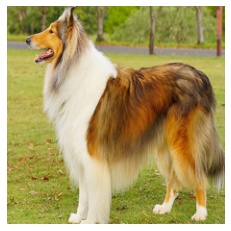

In [ ]:
import matplotlib.pyplot as plt

img = Image.open('dog.jpg').resize((227,227))
plt.imshow(img), plt.axis('off');

- 이미지 예측

In [ ]:
yhat = vgg16.predict(np.array(img).reshape(-1,227,227,3))
label = decode_predictions(yhat)
yhat.shape, label

1/1 [==============================] - 0s 16ms/step


((1, 1000),
 [[('n02106030', 'collie', 0.9300563),
   ('n02105056', 'groenendael', 0.025636291),
   ('n02090622', 'borzoi', 0.013623177),
   ('n02105855', 'Shetland_sheepdog', 0.010050925),
   ('n02106166', 'Border_collie', 0.008561357)]])

In [ ]:
label[0][0][1], label[0][0][2]

('collie', 0.9300563)

- 이미지를 227 x 227 사이즈로 자르기

In [ ]:
IMAGE_SIZE = 227

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE

    new_img = np.array(img.resize((width,height)))

    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]

    return final_img

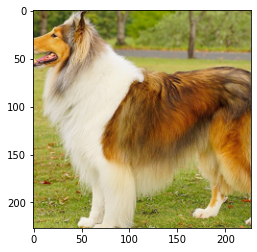

In [ ]:
img = Image.open('dog.jpg')
img2 = center_image(img)
plt.imshow(img2);

In [ ]:
yhat = vgg16.predict(np.array(img2).reshape(-1,227,227,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

1/1 [==============================] - 0s 16ms/step


('collie', 0.98085827)